<a href="https://colab.research.google.com/github/velihansener/Urban_Sounds_Classification/blob/main/Urban_Sounds_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_to_dataset = "/content/drive/MyDrive/spectrograms"

In [3]:
import cv2 as cv
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [5]:
categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [6]:
images = []

for category in categories:

  for image in os.listdir(f"{path_to_dataset}/{category}"):

    path_to_image = f"{path_to_dataset}/{category}/{image}"
    img = cv.imread(path_to_image, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (128,128))
    img = normalize(img)
    images.append([img, int(category)])

In [7]:
images[0][0].shape

(128, 128)

In [8]:
print(np.array(images)[:,1])

[0 0 0 ... 9 9 9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [9]:
for _ in range(10):
  random.shuffle(images)

In [10]:
print(np.array(images)[:,1])

[8 5 4 ... 1 7 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [169]:
x = []
y = []

for image, idx in images:
  x.append(image)
  y.append(idx)

In [170]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

In [171]:
#splitting is 80% for training, 16% for validation and 4% for test sets.
x_train,x_temporary, y_train, y_temporary = train_test_split(x, y, train_size=0.8)

x_val, x_test, y_val, y_test = train_test_split(x_temporary, y_temporary, train_size=0.8)

In [172]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [173]:
print(len(x_train))
print(len(y_train))

print(len(x_val))
print(len(y_val))

print(len(x_test))
print(len(y_test))

6985
6985
1397
1397
350
350


In [174]:
print(x_train[0].shape)
print(x_val[0].shape)
print(x_test[0].shape)

(128, 128)
(128, 128)
(128, 128)


In [185]:
# Create a model object
model = tf.keras.Sequential()

In [186]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu",
                                 input_shape = (128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [187]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))

In [188]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [189]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [190]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [191]:
# Compile the model
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [192]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 flatten_11 (Flatten)        (None, 65536)           

In [193]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(x_val, y_val))

Epoch 1/15
219/219 [==============================] - 5s 22ms/step - loss: 2.0059 - accuracy: 0.2683 - val_loss: 1.4779 - val_accuracy: 0.4882
Epoch 2/15
219/219 [==============================] - 4s 19ms/step - loss: 1.5277 - accuracy: 0.4558 - val_loss: 1.1714 - val_accuracy: 0.6478
Epoch 3/15
219/219 [==============================] - 4s 19ms/step - loss: 1.2642 - accuracy: 0.5505 - val_loss: 0.9153 - val_accuracy: 0.7323
Epoch 4/15
219/219 [==============================] - 4s 19ms/step - loss: 1.0827 - accuracy: 0.6192 - val_loss: 0.7941 - val_accuracy: 0.7702
Epoch 5/15
219/219 [==============================] - 4s 19ms/step - loss: 0.9417 - accuracy: 0.6756 - val_loss: 0.7525 - val_accuracy: 0.7917
Epoch 6/15
219/219 [==============================] - 4s 19ms/step - loss: 0.8300 - accuracy: 0.7068 - val_loss: 0.6468 - val_accuracy: 0.8253
Epoch 7/15
219/219 [==============================] - 4s 19ms/step - loss: 0.7333 - accuracy: 0.7409 - val_loss: 0.6071 - val_accuracy: 0.8110

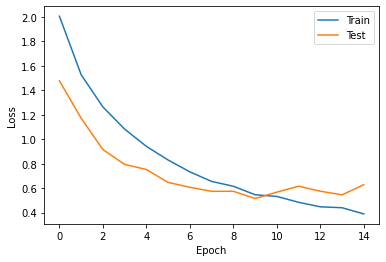

In [194]:
# Plot the the training loss
plt.plot(results.history["loss"], label="Train")
# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Test")
# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()

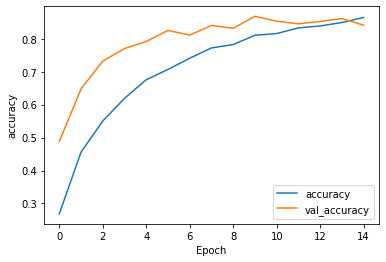

In [195]:
# Plot the the training loss
plt.plot(results.history["accuracy"], label="accuracy")
# Plot the the validation loss
plt.plot(results.history["val_accuracy"], label="val_accuracy")
# Name the x and y axises
plt.ylabel("accuracy")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [196]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [197]:
predictions = probability_model.predict(x_test)

In [198]:
predictions[0]

array([0.0853442 , 0.08533861, 0.08533862, 0.08533869, 0.08533871,
       0.2319397 , 0.08533861, 0.08534077, 0.08534344, 0.08533862],
      dtype=float32)

In [199]:
np.argmax(predictions[0])

5

In [200]:
y_test[0]

5

In [214]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'


  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

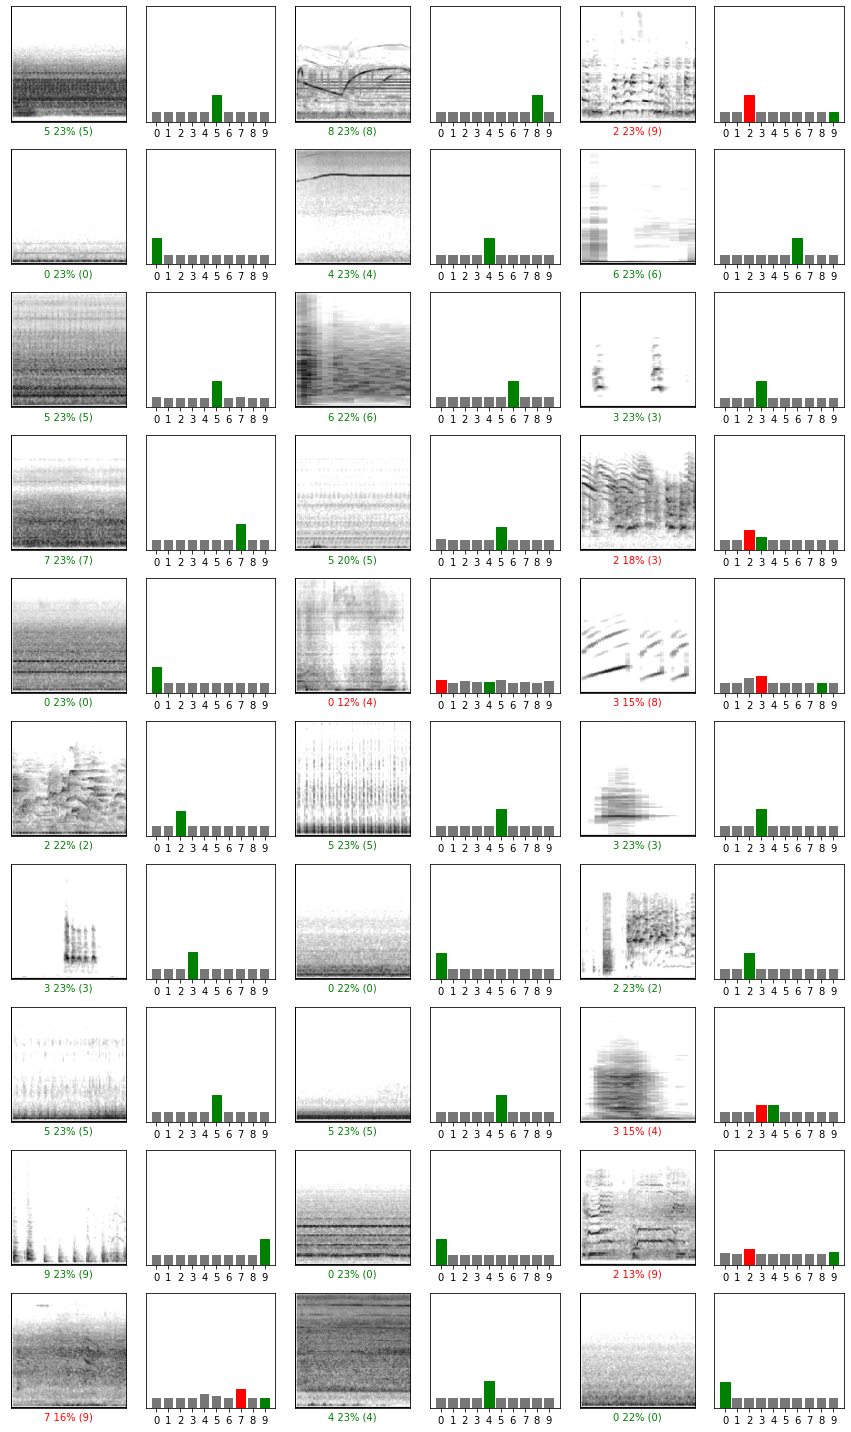

In [215]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in green and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()